In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from glob import glob
import random
import scipy
from scipy.ndimage import imread
import matplotlib.image as mpimg

## Parameter exploration

The following parameters were explored to compare model performance

*    lr: learning rate for Adam Optimizer
*    p: keep probability for dropout
*    kr: kernel regularization for fully convolutional layers added
*    data: original or augmented with simple transformation 

In [2]:
loss_lr001_prob05 = np.array([0.68221456, 0.67145199, 0.65337217, 0.62325525, 0.49515349, 0.42117211, 0.38342857, 0.25111347, 0.21016587, 0.20389962, 0.17459789, 0.31401587, 0.19593601, 0.18123962, 0.20291175, 0.10797896, 0.15060474, 0.17497845, 0.12391307, 0.090620421, 0.058789521, 0.16495878, 0.096907459, 0.21941876, 0.13809973])
loss_lr001_prob07 = np.array([0.71190661, 0.66160679, 0.63345599, 0.59884328, 0.56963742, 0.61210525, 0.44878715, 0.46150553, 0.30753338, 0.2480657, 0.27103782, 0.20715073, 0.15942109, 0.20726275, 0.089859575, 0.19956033, 0.14416017, 0.19425321, 0.16246882, 0.35308629, 0.14825793, 0.069902755, 0.13247457, 0.20963795, 0.072632439])
loss_lr0005_prob05 = np.array([0.67429787, 0.63087386, 0.54464626, 0.28815788, 0.31344315, 0.17481987, 0.14162482, 0.12990089, 0.14398585, 0.17025833, 0.1578868, 0.064249597, 0.15375879, 0.091955885, 0.10451679, 0.071728893, 0.15485342, 0.11742654, 0.05012678, 0.047181375, 0.053061336, 0.11253615, 0.05701286, 0.037344903, 0.064222164, 0.069458172, 0.12764874, 0.032195061, 0.14488418, 0.098624662, 0.049143661, 0.092680253, 0.16512695, 0.11524787, 0.017666638, 0.020378949, 0.13912931, 0.028547954, 0.081110373, 0.031617019, 0.057865191, 0.082749322, 0.088862665, 0.039602503, 0.018456725, 0.054998729, 0.079980865, 0.020258745, 0.028969679, 0.024374707])
loss_lr0005_prob05_aug20 = np.array([0.73016018, 0.68523097, 0.67167997, 0.65913153, 0.63430858, 0.56732297, 0.38342902, 0.28688955, 0.27895588, 0.27005208, 0.22616145, 0.27288774, 0.20514449, 0.20025064, 0.22338817, 0.16148797, 0.17999001, 0.18804637, 0.16673043, 0.17757553, 0.15694849, 0.16638035, 0.12125594, 0.1613207, 0.13901661, 0.15157641, 0.1759602, 0.16972362, 0.12730227, 0.12012213, 0.16313927, 0.17289205, 0.17917751, 0.14497215, 0.17191531, 0.17612323, 0.10996492, 0.15867892, 0.14868371, 0.14412154, 0.10789862, 0.14016211, 0.13470671, 0.13948035, 0.10220858, 0.15837149, 0.13279536, 0.090813465, 0.11245636, 0.11139312])
loss_lr0005_prob05_aug50 = np.array([0.67525572, 0.64533532, 0.53441471, 0.31688455, 0.19516329, 0.23786908, 0.18721619, 0.22367229, 0.23934969, 0.15917657, 0.14663656, 0.18299654, 0.15538572, 0.18254223, 0.13716199, 0.11502255, 0.10195968, 0.10504988, 0.10174707, 0.090919286, 0.13653389, 0.10990729, 0.10119595, 0.075443469, 0.091893733, 0.11311597, 0.088021822, 0.10219462, 0.095843881, 0.088128753, 0.070999049, 0.087592512, 0.076202117, 0.13936327, 0.075641483, 0.077643082, 0.073956937, 0.07350529, 0.068171993, 0.087697424, 0.10120885, 0.061796259, 0.067314014, 0.27080733, 0.10780453, 0.094626397, 0.077235065, 0.089597017, 0.057562057, 0.086388916])
loss_lr00001_prob05_aug50 = np.array([0.7057206, 0.67481256, 0.63546801, 0.4614, 0.26671219, 0.27546972, 0.22436085, 0.16763389, 0.21412553, 0.1558127, 0.15730239, 0.14796598, 0.14198981, 0.17929307, 0.12478599, 0.19479769, 0.1320219, 0.12484933, 0.10529087, 0.11631096, 0.14793277, 0.14187196, 0.075878091, 0.11953232, 0.096575998, 0.110395, 0.09023726, 0.096446037, 0.10277779, 0.10134533, 0.072344206, 0.1488068, 0.073349342, 0.1764463, 0.064259596, 0.082458816, 0.073395357, 0.069716685, 0.081186831, 0.053705089, 0.061403152, 0.067578427, 0.075079404, 0.069058158, 0.067783825, 0.056681156, 0.063056707, 0.071651302, 0.059199046, 0.079550445])
loss_lr00001_prob05_aug50_kreg002 = np.array([0.71305287, 0.6732977, 0.64143634, 0.53070909, 0.34488514, 0.25143704, 0.22313397, 0.18989761, 0.16354121, 0.20220599, 0.13539852, 0.15508464, 0.14466593, 0.097937942, 0.14174846, 0.12315246, 0.10846233, 0.098947316, 0.086116977, 0.10025544, 0.084777847, 0.11860946, 0.11494541, 0.086284533, 0.088741384, 0.10009576, 0.0808305, 0.076732688, 0.089557983, 0.070640169, 0.070535697, 0.072654128, 0.074199282, 0.10329235, 0.065883361, 0.074127287, 0.059911024, 0.076806404, 0.075817354, 0.077863611, 0.07752753, 0.070540264, 0.054968044, 0.071948543, 0.052451625, 0.049859375, 0.058671668, 0.15434603, 0.053291209, 0.057274759])

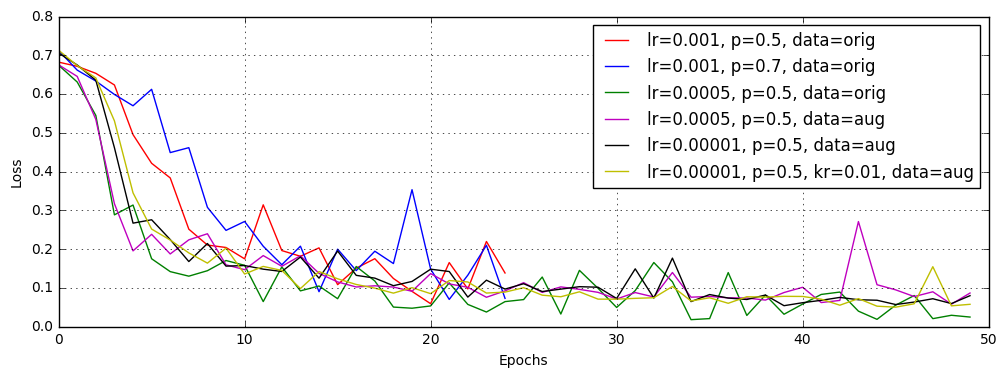

In [40]:
fig, ax = plt.subplots(1, figsize=[12, 4])
ax.plot (loss_lr001_prob05, '-r', label='lr=0.001, p=0.5, data=orig')
ax.plot (loss_lr001_prob07, '-b', label='lr=0.001, p=0.7, data=orig')
ax.plot (loss_lr0005_prob05, '-g', label='lr=0.0005, p=0.5, data=orig')
ax.plot (loss_lr0005_prob05_aug50, '-m', label='lr=0.0005, p=0.5, data=aug')
ax.plot (loss_lr00001_prob05_aug50, '-k', label='lr=0.00001, p=0.5, data=aug')
ax.plot (loss_lr00001_prob05_aug50_kreg002, '-y', label=r'lr=0.00001, p=0.5, kr=0.01, data=aug')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

## Random test results

In [20]:
def random_files(dir_name):
    name = '/home/arko/PROJECTS/Migizi/runs/' + dir_name + '/*.png'
    run_files = glob(name)
    nr = len(run_files)
    n = int(nr * random.random())
    return run_files[n]

In [24]:
figdir = '1507208433.6298428'

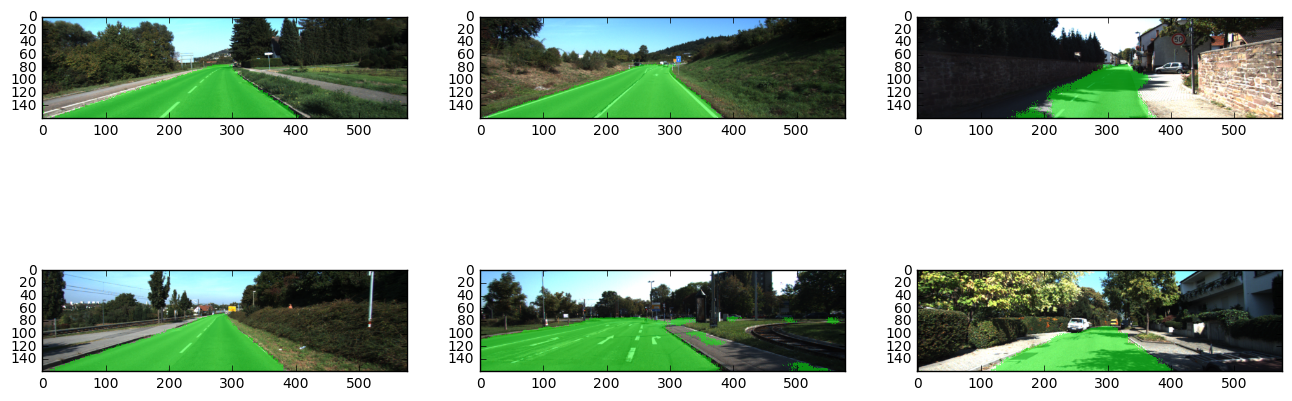

In [42]:
fig = plt.figure(figsize=[16,6])

fig.add_subplot(2,3,1)
plt.imshow(scipy.misc.imread(random_files(figdir)))

fig.add_subplot(2,3,2)
plt.imshow(scipy.misc.imread(random_files(figdir)))

fig.add_subplot(2,3,3)
plt.imshow(scipy.misc.imread(random_files(figdir)))

fig.add_subplot(2,3,4)
plt.imshow(scipy.misc.imread(random_files(figdir)))

fig.add_subplot(2,3,5)
plt.imshow(scipy.misc.imread(random_files(figdir)))

fig.add_subplot(2,3,6)
plt.imshow(scipy.misc.imread(random_files(figdir)))